In [1]:
%%pyspark
#The code below is a python script to turn the tables into a functioning python dataframe.
from pyspark.sql import SparkSession
import pandas as pd
spark = SparkSession.builder.appName("Sanitized_Refund_Lakehouse").getOrCreate()

df = spark.read.table("for_heat_map_for_education")
edu_df = df.toPandas()
df = spark.read.table("SAN_ApartmentNameRef")
part_df = df.toPandas()
part_df['Zip'] = pd.to_numeric(part_df['Zip'], downcast='integer',errors='coerce')
df = spark.read.table("ppl_per_household")
apartment_df = df.toPandas()
edu_df.head()

StatementMeta(, d8f0d368-2112-4fea-abc3-ba7c40d8d36a, 3, Finished, Available, Finished)

,SanitizedName,Percentage_High_school_graduate,Percentage_Associates_degree,Percentage_Bachelors_degree,Percentage_Graduate_degree,Percentage_Completed,Percentage_Expired,AverageFeedback,MultiPartyPercentage,SinglePartyPercentage
0,Wacky Wharf Apartments,6.207379,14.542169,32.759224,33.677216,59.090909,18.181818,5.0,32.95454545454545,67.04545454545455
1,Common Sweetleaf,7.722395,11.754087,23.056865,30.037108,85.981308,13.084112,5.0,54.20560747663551,45.79439252336449
2,Magnifique Manor,14.674567,17.618739,22.331266,11.619295,67.968750,32.031250,5.0,21.09375000000000,78.90625000000000
3,Elm Tree Lodge,8.145369,15.531852,37.349804,18.246975,80.000000,20.000000,5.0,48.33333333333333,51.66666666666667
4,Florida Fishpoison Tree Woods,11.170565,22.112668,34.257200,19.659713,64.367816,34.482759,5.0,40.22988505747126,59.77011494252874


In [2]:
%%pyspark
df = spark.read.format("csv").option("header","true").load("Files/heatmap_ppl_per_household.csv")
# df now is a Spark DataFrame containing CSV data from "Files/heatmap_ppl_per_household.csv".
display(df)

StatementMeta(, d8f0d368-2112-4fea-abc3-ba7c40d8d36a, 4, Finished, Available, Finished)

SynapseWidget(Synapse.DataFrame, 17a53f98-939d-45c2-9635-ae95da398a7f)

In [4]:
%%pyspark
import pandas as pd
# Load data into pandas DataFrame from "/lakehouse/default/Files/heatmap_ppl_per_household.csv"
df = pd.read_csv("/lakehouse/default/Files/heatmap_ppl_per_household.csv")
display(df)


StatementMeta(, 97c69a68-135b-4745-8bd3-6c0682facac8, 6, Finished, Available, Finished)

SynapseWidget(Synapse.DataFrame, 41d57c4a-0340-4f9a-b45e-c9fa0a816117)

In [ ]:
%%pyspark
df = spark.read.format("csv").option("header","true").load("Files/heatmap_ppl_per_household.csv")
# df now is a Spark DataFrame containing CSV data from "Files/heatmap_ppl_per_household.csv".
display(df)

In [3]:
%%pyspark
print(apartment_df)
print(part_df)
print(edu_df)
apartment_df.dtypes

StatementMeta(, d8f0d368-2112-4fea-abc3-ba7c40d8d36a, 5, Finished, Available, Finished)

         zip  1_person  Totalhouseholds Percent_total_households  \
0       1066        27               60                      100   
1       6373        31               54                      100   
2      10519        60              107                      100   
3      12040        17               20                      100   
4      12161        12               23                      100   
...      ...       ...              ...                      ...   
33767  99695         0                0                        0   
33768  99704         0                0                        0   
33769  99707         0                0                        0   
33770  99734         0                0                        0   
33771  99767         0                0                        0   

      Percent_one_person  2_people Percent_two_people  3_people  \
0                     45         0                  0        33   
1                  57.41         0               

zip                             int32
1_person                        int32
Totalhouseholds                 int32
Percent_total_households       object
Percent_one_person             object
2_people                        int32
Percent_two_people             object
3_people                        int32
Percent_three_people           object
4_people_or_more                int32
Percent_four_or_more_people    object
dtype: object

In [4]:
%%pyspark
merged_df = part_df.merge(apartment_df, how = 'left', left_on='Zip', right_on='zip')
merged_df = pd.merge(merged_df, edu_df, on='SanitizedName', how='right')
merged_df['Percent_one_person'] = pd.to_numeric(merged_df['Percent_one_person'], downcast='float',errors='coerce')
merged_df['Percent_two_people'] = pd.to_numeric(merged_df['Percent_two_people'], downcast='float',errors='coerce')
merged_df['Percent_three_people'] = pd.to_numeric(merged_df['Percent_three_people'], downcast='float',errors='coerce')
merged_df['Percent_four_or_more_people'] = pd.to_numeric(merged_df['Percent_four_or_more_people'], downcast='float',errors='coerce')
display(merged_df)
print(merged_df)
merged_df.dtypes

StatementMeta(, d8f0d368-2112-4fea-abc3-ba7c40d8d36a, 6, Finished, Available, Finished)

SynapseWidget(Synapse.DataFrame, ed5ae7c9-6fc9-4627-840c-c5b1d9799c9c)

                     SanitizedName  ProductId      Zip _padZip      zip  \
0           Wacky Wharf Apartments       5235  60605.0   60605  60605.0   
1                 Common Sweetleaf       1973  19004.0   19004  19004.0   
2                 Magnifique Manor       2192  27601.0   27601  27601.0   
3                   Elm Tree Lodge       6685  28209.0   28209  28209.0   
4    Florida Fishpoison Tree Woods       3555  75001.0   75001  75001.0   
..                             ...        ...      ...     ...      ...   
994                Nova Nook Nests       6074   4011.0   04011   4011.0   
995                   Mirage Manor       4588   4011.0   04011   4011.0   
996            Black Hickory Place       2486   4011.0   04011   4011.0   
997              Overcup Oak Woods       6544   4011.0   04011   4011.0   
998            Plush Paragon Place       3385   4011.0   04011   4011.0   

     1_person  Totalhouseholds Percent_total_households  Percent_one_person  \
0     10338.0       

SanitizedName                       object
ProductId                            int32
Zip                                float64
_padZip                             object
zip                                float64
1_person                           float64
Totalhouseholds                    float64
Percent_total_households            object
Percent_one_person                 float32
2_people                           float64
Percent_two_people                 float32
3_people                           float64
Percent_three_people               float32
4_people_or_more                   float64
Percent_four_or_more_people        float32
Percentage_High_school_graduate    float64
Percentage_Associates_degree       float64
Percentage_Bachelors_degree        float64
Percentage_Graduate_degree         float64
Percentage_Completed               float64
Percentage_Expired                 float64
AverageFeedback                    float64
MultiPartyPercentage                object
SingleParty

StatementMeta(, d8f0d368-2112-4fea-abc3-ba7c40d8d36a, 9, Finished, Available, Finished)

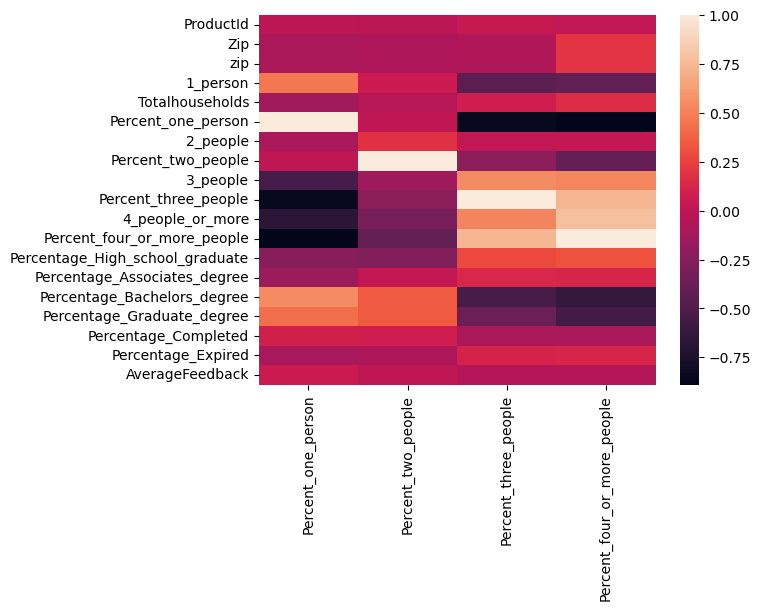

                                 Percent_one_person  Percent_two_people  \
ProductId                                 -0.011567           -0.020569   
Zip                                       -0.094430           -0.081932   
zip                                       -0.094430           -0.081932   
1_person                                   0.463058            0.049643   
Totalhouseholds                           -0.134760           -0.037988   
Percent_one_person                         1.000000           -0.000748   
2_people                                  -0.090652            0.181255   
Percent_two_people                        -0.000748            1.000000   
3_people                                  -0.539801           -0.142843   
Percent_three_people                      -0.847933           -0.221814   
4_people_or_more                          -0.669752           -0.308638   
Percent_four_or_more_people               -0.888470           -0.401239   
Percentage_High_school_gr

In [7]:
%%pyspark
import seaborn as sn
import matplotlib.pyplot as plt
numeric_data = merged_df.select_dtypes(include=['float','int'])
correlation_matrix = numeric_data.corr()
correlation = correlation_matrix[['Percent_one_person', 'Percent_two_people', 'Percent_three_people', 'Percent_four_or_more_people']]
hm = sn.heatmap(data=correlation)
plt.show()
print(correlation)
merged_df.to_csv('abfss://16a370d4-5a15-45bb-ac81-a743cf19fbad@onelake.dfs.fabric.microsoft.com/488545cc-fe6d-40c4-b609-c1b59c27c985/Files/heatmap_ppl_per_household.csv', index=False)